*Imports*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data = pd.read_csv('/content/Features_combined.csv')

print(data.head())
print(data.columns)

           0           1          2          3          4          5  \
0 -642.06090  108.210945 -10.606920  67.186120 -14.965309  21.728197   
1 -634.53455  138.745180 -25.565720  45.151340  -7.399083  19.283112   
2 -363.18735  146.278460 -68.896740  52.735188 -18.276760  31.332811   
3 -100.85547  176.889480 -40.686780  33.945950  -1.921574  30.010950   
4 -105.10822  178.339100 -42.301815  31.098093   3.495722  34.628902   

          6          7          8          9  ...        31        32  \
0  2.582888  11.604472 -24.652874  17.227154  ...  0.019952 -0.010839   
1  2.707990   8.712544  -8.491128  13.053898  ... -0.011474  0.003522   
2 -2.968685  16.404285   5.250308   6.494044  ... -0.011669  0.011385   
3  4.855892  10.836736 -10.383341   4.186645  ... -0.047365 -0.014389   
4  5.231517  12.170620 -11.026355   5.266486  ... -0.020646 -0.003456   

         33        34        35        36        37        38  Label  \
0  0.036636  0.005185  0.013216 -0.012983  0.020524  0.0

# **Splitting the data**

In [ ]:
X = data.drop(columns=['Label','File_Name'])
y = data['Label']

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **SVM (Support Vector Machine)**

In [ ]:
model = SVC(kernel='rbf', C=1.0, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


y_test_decoded = le.inverse_transform(y_test)
y_pred_decoded = le.inverse_transform(y_pred)

accuracy = accuracy_score(y_test_decoded, y_pred_decoded)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))


Accuracy: 0.7100

Classification Report:
              precision    recall  f1-score   support

       Anger       0.84      0.70      0.76      1988
        Fear       0.60      0.66      0.63      1833
   Happiness       0.63      0.60      0.61      1901
     Neutral       0.71      0.81      0.76      1750
     Sadness       0.80      0.80      0.80      1715

    accuracy                           0.71      9187
   macro avg       0.72      0.71      0.71      9187
weighted avg       0.72      0.71      0.71      9187



**Visualization**

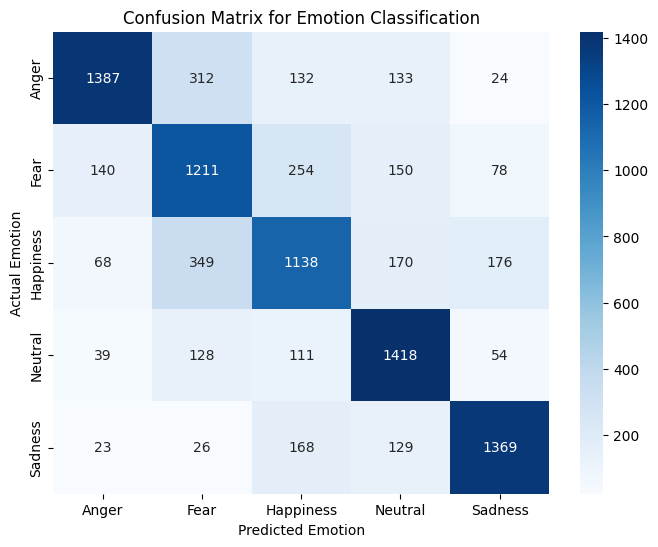

In [ ]:

cm = confusion_matrix(y_test, y_pred)


emotion_labels = le.classes_


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.title('Confusion Matrix for Emotion Classification')
plt.xlabel('Predicted Emotion')
plt.ylabel('Actual Emotion')
plt.show()

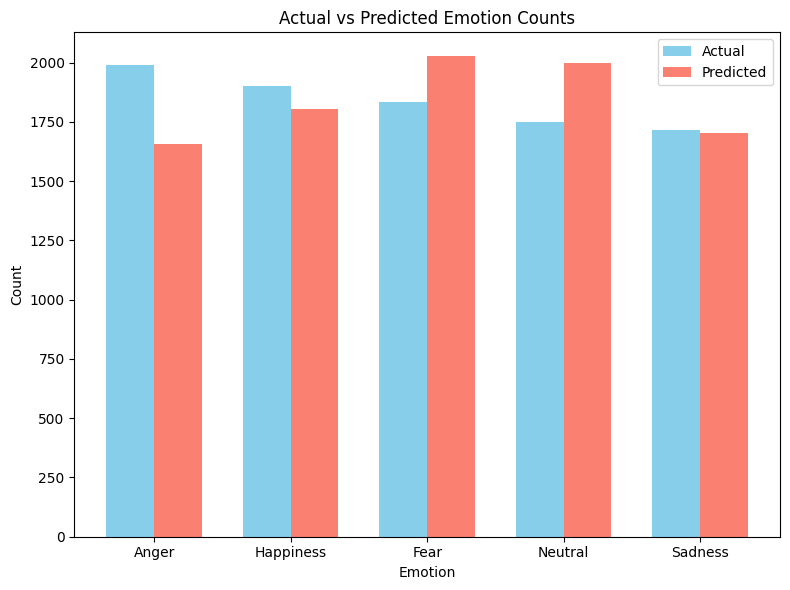

In [ ]:

actual_counts = pd.Series(le.inverse_transform(y_test)).value_counts()
predicted_counts = pd.Series(le.inverse_transform(y_pred)).value_counts()


emotions = list(actual_counts.index)
actual_data = [actual_counts.get(emo, 0) for emo in emotions]
predicted_data = [predicted_counts.get(emo, 0) for emo in emotions]


fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
x = range(len(emotions))


plt.bar(x, actual_data, bar_width, label='Actual', color='skyblue')
plt.bar([i + bar_width for i in x], predicted_data, bar_width, label='Predicted', color='salmon')


plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Actual vs Predicted Emotion Counts')
plt.xticks([i + bar_width/2 for i in x], emotions)
plt.legend()
plt.tight_layout()
plt.show()

# **KNN (K- Nearest Neighbor)**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report


model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_test_decoded = le.inverse_transform(y_test)
y_pred_decoded = le.inverse_transform(y_pred)

accuracy = accuracy_score(y_test_decoded, y_pred_decoded)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))


Accuracy: 0.6081

Classification Report:
              precision    recall  f1-score   support

       Anger       0.59      0.79      0.67      1988
        Fear       0.49      0.52      0.50      1833
   Happiness       0.56      0.46      0.50      1901
     Neutral       0.69      0.66      0.67      1750
     Sadness       0.78      0.61      0.69      1715

    accuracy                           0.61      9187
   macro avg       0.62      0.61      0.61      9187
weighted avg       0.62      0.61      0.61      9187



**Visualization**

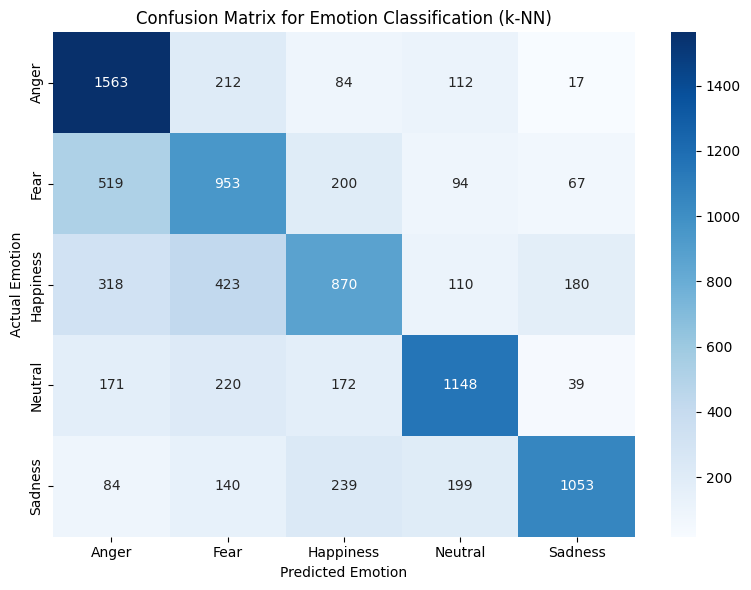

In [ ]:
cm = confusion_matrix(y_test, y_pred)
emotion_labels = le.classes_

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.title('Confusion Matrix for Emotion Classification (k-NN)')
plt.xlabel('Predicted Emotion')
plt.ylabel('Actual Emotion')
plt.tight_layout()

plt.show()
plt.savefig('confusion_matrix.png')
plt.close()


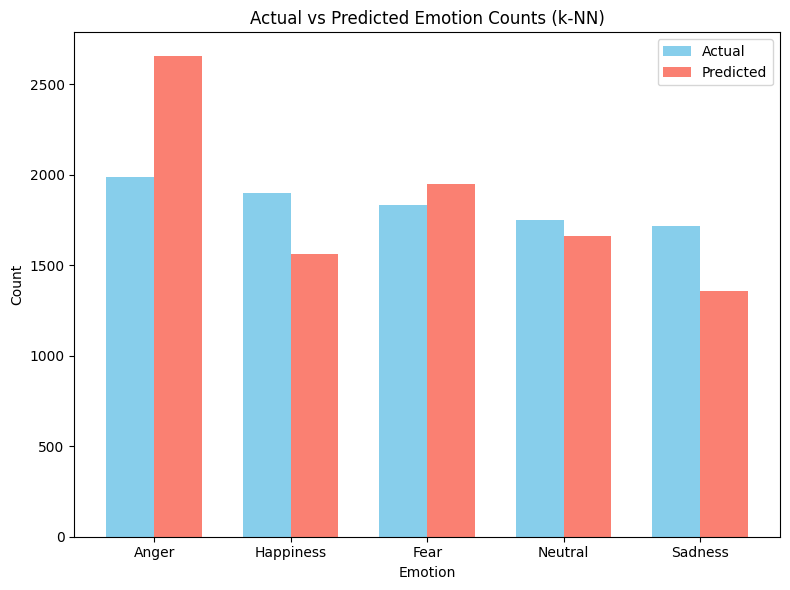

In [ ]:
actual_counts = pd.Series(le.inverse_transform(y_test)).value_counts()
predicted_counts = pd.Series(le.inverse_transform(y_pred)).value_counts()
emotions = list(actual_counts.index)
actual_data = [actual_counts.get(emo, 0) for emo in emotions]
predicted_data = [predicted_counts.get(emo, 0) for emo in emotions]

fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
x = range(len(emotions))

plt.bar(x, actual_data, bar_width, label='Actual', color='skyblue')
plt.bar([i + bar_width for i in x], predicted_data, bar_width, label='Predicted', color='salmon')

plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Actual vs Predicted Emotion Counts (k-NN)')
plt.xticks([i + bar_width/2 for i in x], emotions)
plt.legend()
plt.tight_layout()

plt.show()
plt.savefig('emotion_counts.png')
plt.close()


# **XG Boost**

In [ ]:
# Initialize and train the model
model = xgb.XGBClassifier(
    objective='multi:softmax',  # Multi-class classification
    num_class=len(le.classes_), # Number of emotions
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred, target_names=le.classes_))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

       Anger       0.83      0.65      0.72      1988
        Fear       0.57      0.62      0.59      1833
   Happiness       0.58      0.53      0.55      1901
     Neutral       0.64      0.79      0.71      1750
     Sadness       0.73      0.73      0.73      1715

    accuracy                           0.66      9187
   macro avg       0.67      0.66      0.66      9187
weighted avg       0.67      0.66      0.66      9187

Accuracy: 0.6602808316098835


<Figure size 1200x600 with 0 Axes>

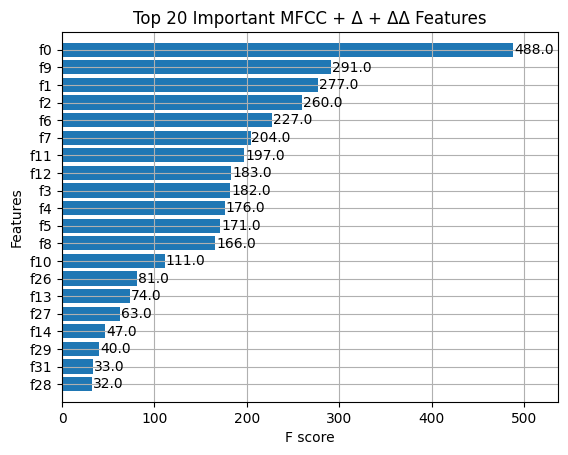

In [ ]:
# Plot feature importance
plt.figure(figsize=(12, 6))
xgb.plot_importance(model, max_num_features=20, height=0.8)
plt.title("Top 20 Important MFCC + Δ + ΔΔ Features")
plt.show()

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

grid = GridSearchCV(xgb.XGBClassifier(objective='multi:softmax'), param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best accuracy:", grid.best_score_)

Best params: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Best accuracy: 0.7648851257051109


**Visualization**

[0]	validation_0-mlogloss:1.37588
[1]	validation_0-mlogloss:1.23925
[2]	validation_0-mlogloss:1.14267
[3]	validation_0-mlogloss:1.07253
[4]	validation_0-mlogloss:1.01812
[5]	validation_0-mlogloss:0.97619
[6]	validation_0-mlogloss:0.94177
[7]	validation_0-mlogloss:0.91064
[8]	validation_0-mlogloss:0.88635
[9]	validation_0-mlogloss:0.86265
[10]	validation_0-mlogloss:0.84468
[11]	validation_0-mlogloss:0.82927
[12]	validation_0-mlogloss:0.81526
[13]	validation_0-mlogloss:0.80383
[14]	validation_0-mlogloss:0.79374
[15]	validation_0-mlogloss:0.78448
[16]	validation_0-mlogloss:0.77629
[17]	validation_0-mlogloss:0.76905
[18]	validation_0-mlogloss:0.76235
[19]	validation_0-mlogloss:0.75667
[20]	validation_0-mlogloss:0.75238
[21]	validation_0-mlogloss:0.74798
[22]	validation_0-mlogloss:0.74378
[23]	validation_0-mlogloss:0.73866
[24]	validation_0-mlogloss:0.73063
[25]	validation_0-mlogloss:0.72655
[26]	validation_0-mlogloss:0.72490
[27]	validation_0-mlogloss:0.72192
[28]	validation_0-mlogloss:0.7

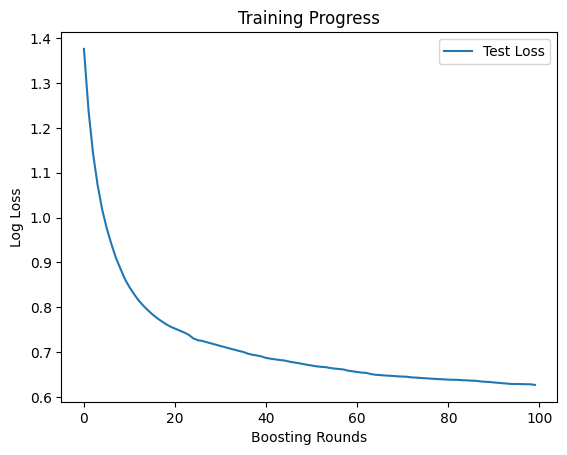

In [ ]:
# Train with early stopping and eval_set
model = xgb.XGBClassifier(eval_metric='mlogloss', early_stopping_rounds=10)
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

# Plot training history
results = model.evals_result()
plt.plot(results['validation_0']['mlogloss'], label='Test Loss')
plt.xlabel('Boosting Rounds')
plt.ylabel('Log Loss')
plt.title('Training Progress')
plt.legend()
plt.show()

In [ ]:
# Calculate metrics
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None)
metrics_df = pd.DataFrame({
    'Emotion': le.classes_,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})

# Plot
metrics_df.set_index('Emotion').plot(kind='bar', figsize=(12, 6))
plt.title('Precision, Recall, and F1-Score per Emotion')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.ylim(0, 1.1)
plt.legend(loc='lower right')
plt.show()

NameError: name 'precision_recall_fscore_support' is not defined

# **Random Forest**

In [ ]:
# Train Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.7610754326766083
              precision    recall  f1-score   support

       Anger       0.90      0.75      0.82      1988
        Fear       0.68      0.75      0.71      1833
   Happiness       0.73      0.66      0.69      1901
     Neutral       0.74      0.83      0.78      1750
     Sadness       0.78      0.83      0.80      1715

    accuracy                           0.76      9187
   macro avg       0.77      0.76      0.76      9187
weighted avg       0.77      0.76      0.76      9187



**Visualization**

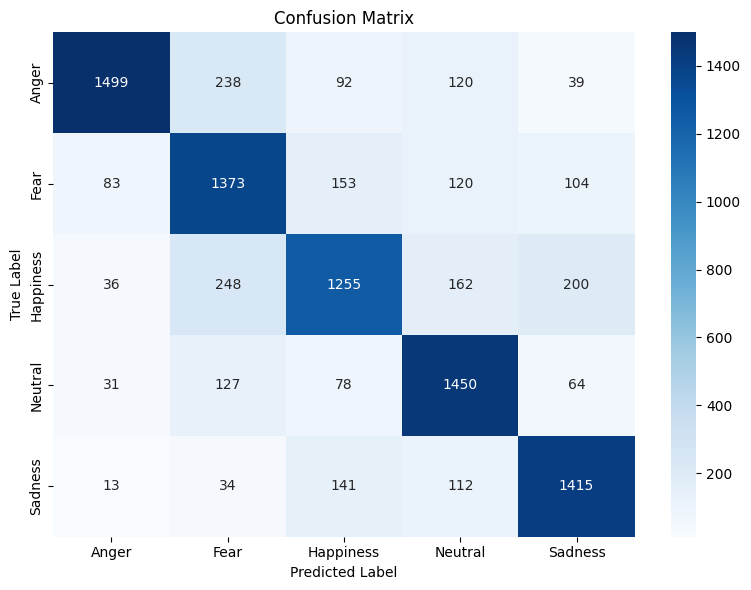

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

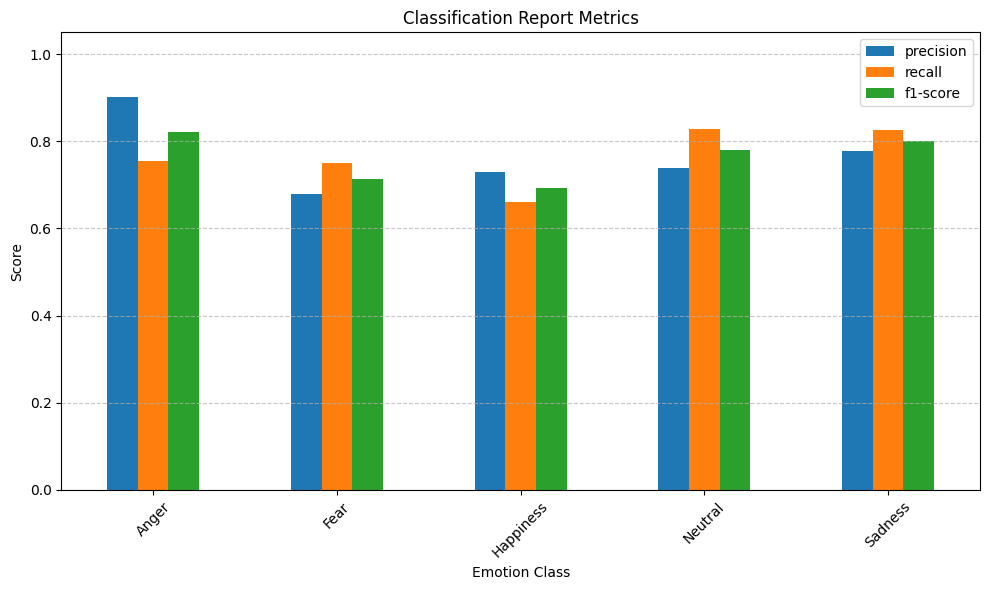

In [ ]:
# Get classification report as dict
report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Drop accuracy/support rows for plot clarity
report_df = report_df.iloc[:-3, :]  # only classes, not "accuracy", etc.

# Plot precision, recall, F1-score for each class
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report Metrics')
plt.xlabel('Emotion Class')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()